In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ast

In [2]:
ptm_df = pd.read_csv('Data/Conserved_ptms_best_loc.csv')
mod_residues_dic = []
for i in ptm_df.mod_residues_dic:
    d = ast.literal_eval(i)
    mod_residues_dic.append(d)
ptm_df.mod_residues_dic = mod_residues_dic
num_species = []
for index, row in ptm_df.iterrows():
    d = row['mod_residues_dic']
    species = 0
    for key in d:
        if len(d[key][0]) > species:
            species = len(d[key][0])
    num_species.append(species)
ptm_df['num_species'] = num_species
ptm_df = ptm_df.sort_values('num_species', ascending = False)
ptm_df = ptm_df[ptm_df.num_species >=5]
residues = ['Ammonium', 'Methyl:2H(3)13C(1)', 'Delta:H(4)C(2)O(-1)S(1)', 'Fluoro', 'Cation:Mg[II]', 'Acetyl:13C(2)', 'Label:2H(3)+Oxidation', 'Cation:Na', 'Cation:Fe[III]', 'Cation:Ca[II]', 'Label:13C(4)', 'Methyl:2H(3)']
ptm_df = ptm_df[~ptm_df.Modification.isin(residues)]
ptm_df

,Unnamed: 0,Gene,Modification,mod_residues_dic,num_species
221,221,prfB,Methyl,"{273: [{'Rhodopseudomonas_palustris', 'Cupriav...",13
343,343,rplL,Carbamyl,"{8: [{'Cellvibrio_gilvus', 'Mycobacterium_smeg...",10
218,218,prfA,Methyl,"{244: [{'Citrobacter_freundii', 'Rhizobium_rad...",9
696,696,tuf,Carbamyl,"{21: [{'Cellulophaga_baltica', 'Delftia_acidov...",8
503,503,rpsB,Ammonia-loss,"{42: [{'Stigmatella_aurantiaca', 'Paracoccus_d...",7
136,136,fusA,Dihydroxyimidazolidine,"{74: [{'Citrobacter_freundii', 'Cupriavidus_ne...",7
137,137,fusA,Ethoxyformyl,"{74: [{'Citrobacter_freundii', 'Cupriavidus_ne...",7
135,135,fusA,Carboxyethyl,"{74: [{'Citrobacter_freundii', 'Cupriavidus_ne...",7
92,92,dnaK,Ammonia-loss,"{61: [{'Paracoccus_denitrificans', 'Citrobacte...",7
32,32,atpA,Carbamyl,"{5: [{'Paracoccus_denitrificans', 'Bacillus_su...",7


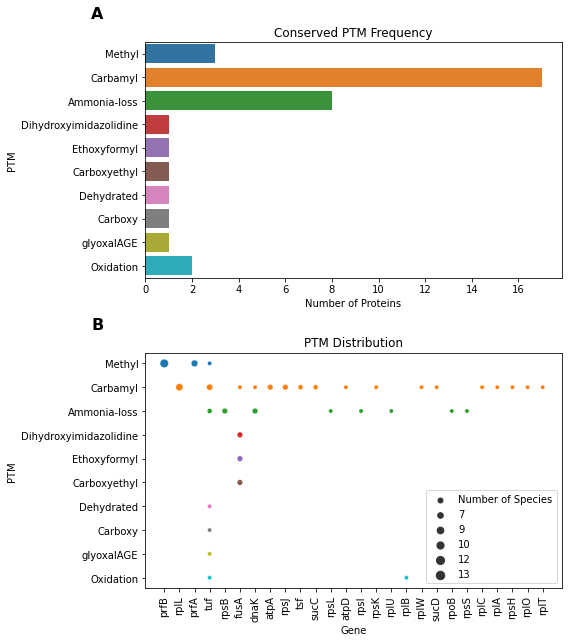

In [3]:
fig, axes = plt.subplots(2,1, figsize = (8,9))
sns.countplot(ax = axes[0], data = ptm_df, y= 'Modification')
sns.scatterplot(ax = axes[1], data = ptm_df, y = 'Modification', x = 'Gene', size = 'num_species', hue = 'Modification')
current_handles, current_labels = plt.gca().get_legend_handles_labels()
del current_labels[0:12]
del current_handles[0:12]
current_labels[0] = 'Number of Species'
plt.legend(current_handles, current_labels)
axes[0].set_ylabel('PTM')
axes[0].set_xlabel('Number of Proteins') 
axes[0].set_title('Conserved PTM Frequency')
axes[0].text(-0.1, 1.15, 'A', transform = axes[0].transAxes, 
             fontsize = 16, fontweight = 'bold', va = 'top', ha = 'right')
axes[1].text(-0.1, 1.15, 'B', transform = axes[1].transAxes, 
             fontsize = 16, fontweight = 'bold', va = 'top', ha = 'right')
axes[1].set_ylabel('PTM')
axes[1].set_title('PTM Distribution')
axes[1].tick_params(axis = 'x', labelrotation = 90)
plt.tight_layout()
plt.savefig('Figures/Figure_3.png')